In [1]:
import os
from IPython.display import display, HTML
ModuleFolder='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\Py-Databases-SQL-DS\\IBM\\NBs\\'
os.chdir(ModuleFolder)

In [2]:
import os
ModuleFolder='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\Py-Databases-SQL-DS\\IBM\\NBs\\M03'
os.chdir(ModuleFolder)

In [3]:
#Install & load sqlite3

#!pip install sqlite3  ##Uncomment this code only if you are working in a local environment to install sqlite3
import sqlite3

In [4]:
# Connecting to sqlite
# connection object
conn = sqlite3.connect('INSTRUCTOR.db')

Cursor class is an instance using which you can invoke methods that execute SQLite statements, fetch data from the result sets of the queries. You can create Cursor object using the cursor() method of the Connection object/class.


In [5]:
# cursor object
cursor_obj = conn.cursor()

## Task 2: Create a table in the database

In this step we will create a table in the database with following details:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/table.png" align="center">


Before creating a table, let's first check if the table already exists or not. To drop the table from a database, use the **DROP** query. A cursor is an object that helps execute the query and fetch the records from the database.


In [6]:
# Drop the table if already exists.
cursor_obj.execute("DROP TABLE IF EXISTS INSTRUCTOR")

## Dont worry if you get this error:

If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.

<strong>Exception: \[IBM]\[CLI Driver]\[DB2/LINUXX8664] SQL0204N  "ABC12345.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204</strong>


In [7]:
# Creating table
table = """ create table IF NOT EXISTS INSTRUCTOR(ID INTEGER PRIMARY KEY NOT NULL, FNAME VARCHAR(20), LNAME VARCHAR(20), CITY VARCHAR(20), CCODE CHAR(2));"""
 
cursor_obj.execute(table)
 
print("Table is Ready")

Table is Ready


## Task 3: Insert data into the table

In this step we will insert some rows of data into the table.

The INSTRUCTOR table we created in the previous step contains 3 rows of data:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/images/table1.png" align="center">

We will start by inserting just the first row of data, i.e. for instructor Rav Ahuja


In [8]:
cursor_obj.execute('''insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA')''')

The output you will get something as: <strong>sqlite3.Cursor at 0x27a1a491260</strong> which means mySql database has sqlite3.Cursor object at 0x27a1a49126 as output in table. But you may get the different number.

Now use a single query to insert the remaining two rows of data


In [9]:
cursor_obj.execute('''insert into INSTRUCTOR values (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')''')

## Task 4: Query data in the table

In this step we will retrieve data we inserted into the INSTRUCTOR table.


In [10]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)

print("All the data")
output_all = cursor_obj.fetchall()
for row_all in output_all:
  print(row_all)
# This is the list returned by output_all
print(output_all)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')
(3, 'Hima', 'Vasudevan', 'Chicago', 'US')
[(1, 'Rav', 'Ahuja', 'TORONTO', 'CA'), (2, 'Raul', 'Chong', 'Markham', 'CA'), (3, 'Hima', 'Vasudevan', 'Chicago', 'US')]


In [11]:
## Fetch few rows from the table
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
# If you want to fetch few rows from the table we use fetchmany(numberofrows) and mention the number how many rows you want to fetch
output_many = cursor_obj.fetchmany(2) 
for row_many in output_many:
  print(row_many)

All the data
(1, 'Rav', 'Ahuja', 'TORONTO', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


In [12]:
# Fetch only FNAME from the table
statement = '''SELECT FNAME FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
output_column = cursor_obj.fetchall()
for fetch in output_column:
  print(fetch)

All the data
('Rav',)
('Raul',)
('Hima',)


<Strong>Bonus: now write and execute an update statement that changes the Rav's CITY to MOOSETOWN</strong>


In [13]:
query_update='''update INSTRUCTOR set CITY='MOOSETOWN' where FNAME="Rav"'''
cursor_obj.execute(query_update)

In [14]:
statement = '''SELECT * FROM INSTRUCTOR'''
cursor_obj.execute(statement)
  
print("All the data")
output1 = cursor_obj.fetchmany(2)
for row in output1:
  print(row)

All the data
(1, 'Rav', 'Ahuja', 'MOOSETOWN', 'CA')
(2, 'Raul', 'Chong', 'Markham', 'CA')


## Task 5: Retrieve data into Pandas

In this step we will retrieve the contents of the INSTRUCTOR table into a Pandas dataframe


In [15]:
#!pip install pandas
import pandas as pd
#retrieve the query results into a pandas dataframe
df = pd.read_sql_query("select * from instructor;", conn)

#print the dataframe
df

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


In [16]:
#print just the LNAME for first row in the pandas data frame
df.LNAME[0]

'Ahuja'

Once the data is in a Pandas dataframe, you can do the typical pandas operations on it.

For example you can use the shape method to see how many rows and columns are in the dataframe


In [17]:
df.shape

(3, 5)

## Task 6: Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [18]:
# Close the connection
conn.close()

In [19]:
#%pwd
#%ls
try:
    %load_ext sql
except Exception as E:
    %reload_ext sql
import csv, sqlite3

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database

##### The syntax for connecting to magic sql using sqllite is

  **%sql sqlite://DatabaseName**   
  
where DatabaseName will be your **.db** file 


In [20]:
#!pip install ipython-sql
#!pip install seaborn
import seaborn as sns
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [21]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
#!pip install pandas 

In [22]:
%sql sqlite:///socioeconomic.db

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.



In [23]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [24]:
# Install the 'ipython-sql' and 'prettytable' libraries using pip
#!pip install ipython-sql prettytable

# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

##### You can verify that the table creation was successful by making a basic query like:


In [25]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;


 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [26]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78
```

</details>


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [27]:
%sql SELECT COUNT(*) as count FROM chicago_socioeconomic_data WHERE hardship_index > 50


 * sqlite:///socioeconomic.db
Done.


count
38


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

Correct answer: 38
```

</details>


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [28]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
```

</details>


### Problem 4

##### Which community area which has the highest hardship index?


In [29]:
%sql SELECT * FROM chicago_socioeconomic_data WHERE hardship_index= (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
54.0,Riverdale,5.8,56.5,34.6,27.5,51.5,8201,98.0


<details><summary>Click here for the solution</summary>

```python
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0;

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data );

Correct answer: 'Riverdale'
    
```

</details>


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [30]:
%sql SELECT * FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
32.0,Loop,1.5,14.7,5.7,3.1,13.5,65526,3.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
    
```

</details>


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


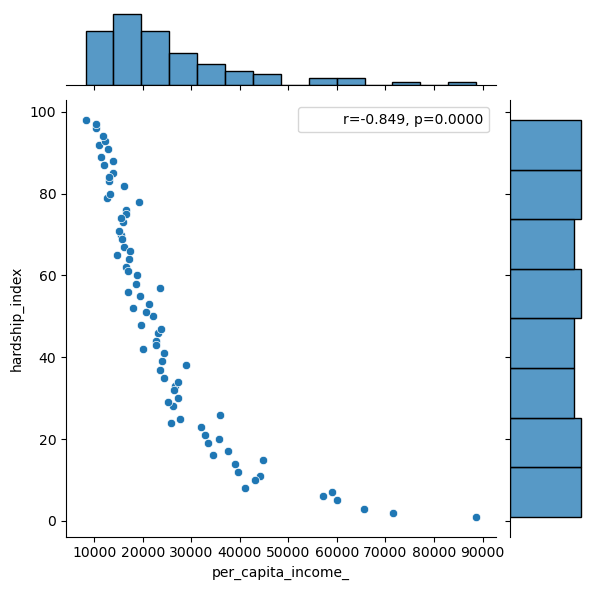

In [31]:
import pandas as pd
import numpy as np
!pip install scipy
import scipy.stats
CSD=%sql SELECT * FROM chicago_socioeconomic_data;
df=pd.DataFrame(CSD)
j=sns.jointplot(x='per_capita_income_',y='hardship_index',data=df)
x=np.array(df['per_capita_income_'])
y=np.array(df['hardship_index'])
X=x[np.isnan(x)==False]
Y=y[np.isnan(y)==False]
minl=min([len(X),len(Y)])
X=X[0:minl]
Y=Y[0:minl]
#print(np.isnan(X))
#print(np.isnan(Y))
r,p=scipy.stats.pearsonr(X,Y)
#j.annotate(stats.pearsonr)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.4f}'.format(r,p)])

#j.ax_joint.legend([phantom],[f'r={round(r,3)}, p={float(p)}'])

<details><summary>Click here for the solution</summary>

```python
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn

!pip install matplotlib seaborn
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())


Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
    
```

</details>


### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


Remember that equation for the pearson correlation in 

\begin{equation*}
  r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
\end{equation*}

## Chicago Public Schools - Progress Report Cards (2011-2012)

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: [https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t](https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: [https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true](https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01&download=true&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

**NOTE**:

Do not download the dataset directly from City of Chicago portal. Instead download a static copy which is a more database friendly version from this <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01">link</a>.

Now review some of its contents.


### Connect to the database

Let us now load the ipython-sql  extension and establish a connection with the database

##### The syntax for connecting to magic sql using sqllite is

  **%sql sqlite://DatabaseName**   
  
where DatabaseName will be your **.db** file 


In [32]:
import csv, sqlite3

con = sqlite3.connect("CPS.db")
cur = con.cursor()

In [33]:
#!pip install pandas
#!pip install ipython-sql prettytable

import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [34]:
#!pip install ipython-sql
# Extension for working with SQL 
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [35]:
#The syntax for connecting to magic sql using sqllite is
#%sql sqlite://DatabaseName 

%sql sqlite:///RealWorldData.db

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet.  
##### To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.


In [36]:
import pandas as pd
lk1='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv'
lk2='https://data.cityofchicago.org/resource/9xs2-f89t.csv'
df=pd.read_csv(lk2)
df.iloc[0:2,:]
#df=pd.DataFrame(csv_pandas)


,school_id,name_of_school,elementary_or_high_school,street_address,city,state,zip_code,phone_number,link_,network_manager,...,rcdts_code,x_coordinate,y_coordinate,latitude,longitude,community_area_number,community_area_name,ward,police_district,location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,150000000000000,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"


In [37]:
df.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")

566

Double-click **here** for the solution.
<!--

import pandas

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv")
df.to_sql("CHICAGO_PUBLIC_SCHOOLS_DATA", con, if_exists='replace', index=False, method="multi")

-->


### Query the database system catalog to retrieve table metadata

##### You can verify that the table creation was successful by retrieving the list of all tables in your schema and checking whether the SCHOOLS table was created


In [38]:
# type in your query to retrieve list of all tables in the database
%load_ext sql
import csv, sqlite3
%sql SELECT name FROM sqlite_master WHERE type='table'

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
Done.


name


Double-click **here** for a hint

<!--
In sqlite the system catalog table called sqlite_master contains the table metadata
-->


Double-click **here** for the solution.

<!-- Solution using SQLite:

%sql SELECT name FROM sqlite_master WHERE type='table'

-->


In [39]:
%sql SELECT * FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA') limit 5;

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
Done.


cid,name,type,notnull,dflt_value,pk


### Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?


In [40]:
# type in your query to retrieve the number of columns in the SCHOOLS table
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
Done.


count(name)
0


Double-click **here** for the solution.

<!-- Solution SQLite:
%sql SELECT count(name) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

-->


Now retrieve the the list of columns in SCHOOLS table and their column type (datatype) and length.


In [41]:
# type in your query to retrieve all column names in the SCHOOLS table along with their datatypes and length
# The code below shows that TEXT and INTEGER have lengths 4 & 7, but not like type(varchar(20)) = 20
%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA') limit 5;

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
Done.


name,type,length(type)


Double-click **here** for the solution.

<!-- Solution 

%sql SELECT name,type,length(type) FROM PRAGMA_TABLE_INFO('CHICAGO_PUBLIC_SCHOOLS_DATA');

-->


### Questions

1.  Is the column name for the "SCHOOL ID" attribute in upper or mixed case?
2.  What is the name of "Community Area Name" column in your table? Does it have spaces?
3.  Are there any columns in whose names the spaces and paranthesis (round brackets) have been replaced by the underscore character "\_"?


## Problems

### Problem 1

##### How many Elementary Schools are in the dataset?


In [42]:
%sql select count(distinct(lower(name_of_school))) as No_Schools from CHICAGO_PUBLIC_SCHOOLS_DATA as schools where elementary_or_high_school='ES'

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select count(distinct(lower(name_of_school))) as No_Schools from CHICAGO_PUBLIC_SCHOOLS_DATA as schools where elementary_or_high_school='ES']
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
Which column specifies the school type e.g. 'ES', 'MS', 'HS'? ("Elementary School, Middle School, High School")
-->


Double-click **here** for another hint

<!--
Does the column name have mixed case, spaces or other special characters?
If so, ensure you use double quotes around the "Name of the Column"
-->


Double-click **here** for the solution.

<!-- Solution:

%sql select count(*) from CHICAGO_PUBLIC_SCHOOLS_DATA where "Elementary, Middle, or High School"='ES'

Correct answer: 462

-->


### Problem 2

##### What is the highest Safety Score?


In [43]:

%sql select max(safety_score) from CHICAGO_PUBLIC_SCHOOLS_DATA;

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select max(safety_score) from CHICAGO_PUBLIC_SCHOOLS_DATA;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
Use the MAX() function
-->


Double-click **here** for the solution.

<!-- Hint:

%sql select MAX(Safety_Score) AS MAX_SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS_DATA

Correct answer: 99
-->


### Problem 3

##### Which schools have highest Safety Score?


In [44]:
#%sql select * from CHICAGO_PUBLIC_SCHOOLS_DATA where safety_score = (select max(safety_score) from CHICAGO_PUBLIC_SCHOOLS_DATA);
#Just to count them
%sql select count(*) from CHICAGO_PUBLIC_SCHOOLS_DATA where safety_score = (select max(safety_score) from CHICAGO_PUBLIC_SCHOOLS_DATA);

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select count(*) from CHICAGO_PUBLIC_SCHOOLS_DATA where safety_score = (select max(safety_score) from CHICAGO_PUBLIC_SCHOOLS_DATA);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution:
In the previous problem we found out that the highest Safety Score is 99, so we can use that as an input in the where clause:

%sql select Name_of_School, Safety_Score from CHICAGO_PUBLIC_SCHOOLS_DATA where Safety_Score = 99

or, a better way:

%sql select Name_of_School, Safety_Score from CHICAGO_PUBLIC_SCHOOLS_DATA where \
  Safety_Score= (select MAX(Safety_Score) from CHICAGO_PUBLIC_SCHOOLS_DATA)


Correct answer: several schools with with Safety Score of 99.
-->


### Problem 4

##### What are the top 10 schools with the highest "Average Student Attendance"?


In [45]:
%sql select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance DESC limit 10

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance DESC limit 10]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution:

%sql select Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS_DATA \
    order by Average_Student_Attendance desc nulls last limit 10 

-->


### Problem 5

##### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance


In [46]:
%sql select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance limit 5

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance limit 5]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution:

%sql SELECT Name_of_School, Average_Student_Attendance  \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     order by Average_Student_Attendance \
     LIMIT 5

-->


### Problem 6

##### Now remove the '%' sign from the above result set for Average Student Attendance column


In [47]:
sql select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance limit 5

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA order by average_student_attendance limit 5]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
Use the REPLACE() function to replace '%' with ''

-->


Double-click **here** for the solution.

<!-- Hint:

%sql SELECT Name_of_School, REPLACE(Average_Student_Attendance, '%', '') \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     order by Average_Student_Attendance \
     LIMIT 5

-->


### Problem 7

##### Which Schools have Average Student Attendance lower than 70%?


In [48]:
sql select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA where average_student_attendance < 70

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select name_of_school, average_student_attendance from CHICAGO_PUBLIC_SCHOOLS_DATA where average_student_attendance < 70]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
The datatype of the "Average_Student_Attendance" column is varchar.
So you cannot use it as is in the where clause for a numeric comparison.
First use the CAST() function to cast it as a DECIMAL or DOUBLE
e.g. CAST("Column_Name" as DOUBLE)

-->


Double-click **here** for another hint

<!--
Don't forget the '%' age sign needs to be removed before casting
-->


Double-click **here** for the solution.

<!-- Solution:

%sql SELECT Name_of_School, Average_Student_Attendance  \
     from CHICAGO_PUBLIC_SCHOOLS_DATA \
     where CAST ( REPLACE(Average_Student_Attendance, '%', '') AS DOUBLE ) < 70 \
     order by Average_Student_Attendance
     

-->


### Problem 8

##### Get the total College Enrollment for each Community Area


In [49]:
sql select community_area_name, round(sum(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name order by sum(college_enrollment_rate) DESC limit 10

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select community_area_name, round(sum(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name order by sum(college_enrollment_rate) DESC limit 10]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
Verify the exact name of the Enrollment column in the database
Use the SUM() function to add up the Enrollments for each Community Area
-->


Double-click **here** for another hint

<!--
Don't forget to group by the Community Area
-->


Double-click **here** for the solution.

<!-- Solution:

%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name 

-->


### Problem 9

##### Get the 5 Community Areas with the least total College Enrollment  sorted in ascending order


In [50]:
sql select community_area_name, round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name order by SUM(college_enrollment_rate) ASC limit 5

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select community_area_name, round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name order by SUM(college_enrollment_rate) ASC limit 5]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for a hint

<!--
Order the previous query and limit the number of rows you fetch
-->


Double-click **here** for the solution.

<!-- Solution:

%sql select Community_Area_Name, sum(College_Enrollment) AS TOTAL_ENROLLMENT \
   from CHICAGO_PUBLIC_SCHOOLS_DATA \
   group by Community_Area_Name \
   order by TOTAL_ENROLLMENT asc \
   LIMIT 5 

-->


### Problem 10

##### List 5 schools with lowest safety score.


In [51]:
sql select name_of_school, safety_score from CHICAGO_PUBLIC_SCHOOLS_DATA order by safety_score asc limit 5

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CHICAGO_PUBLIC_SCHOOLS_DATA
[SQL: select name_of_school, safety_score from CHICAGO_PUBLIC_SCHOOLS_DATA order by safety_score asc limit 5]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution SQLite:

%sql SELECT name_of_school, safety_score \
FROM CHICAGO_PUBLIC_SCHOOLS_DATA  where safety_score !='None' \
ORDER BY safety_score \
LIMIT 5

-->




### Problem 11

##### Get the hardship index for the community area of the school which has College Enrollment of 4368


In [52]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")

78

In [53]:
#sql select * from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS limit 2
#%sql select college_enrollment_rate from CHICAGO_PUBLIC_SCHOOLS_DATA CPS

In [54]:
%%sql
select CPS.name_of_school, CD.hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment_rate = (select round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name)

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CENSUS_DATA
[SQL: select CPS.name_of_school, CD.hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment_rate = (select round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution:
NOTE: For this solution to work the CHICAGO_SOCIOECONOMIC_DATA table 
      as created in the last lab of Week 3 should already exist. If the CHICAGO_SOCIOECONOMIC_DATA table does not exists, please execute the following code beforehand.

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")


%%sql 
select hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment = 4368


-->


### Problem 12

##### Get the hardship index for the community area which has the highest value for College Enrollment


In [55]:
%%sql
select CPS.name_of_school, CD.hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment_rate = (select round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name)

 * sqlite:///RealWorldData.db
   sqlite:///socioeconomic.db
(sqlite3.OperationalError) no such table: CENSUS_DATA
[SQL: select CPS.name_of_school, CD.hardship_index from CENSUS_DATA CD, CHICAGO_PUBLIC_SCHOOLS_DATA CPS 
where CD.community_area_number = CPS.community_area_number 
and college_enrollment_rate = (select round(SUM(college_enrollment_rate),2) from CHICAGO_PUBLIC_SCHOOLS_DATA group by community_area_name)]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Double-click **here** for the solution.

<!-- Solution:
NOTE: For this solution to work the CHICAGO_SOCIOECONOMIC_DATA table 
      as created in the last lab of Week 3 should already exist. If the CHICAGO_SOCIOECONOMIC_DATA table does not exists, please execute the following code beforehand.

df = pandas.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv")
df.to_sql("CENSUS_DATA", con, if_exists='replace', index=False,method="multi")

%sql select community_area_number, community_area_name, hardship_index from CENSUS_DATA \
   where community_area_number in \
   ( select community_area_number from CHICAGO_PUBLIC_SCHOOLS_DATA order by college_enrollment desc limit 1 )
-->


## Summary

##### In this lab you learned how to work with a real word dataset using SQL and Python. You learned how to query columns with spaces or special characters in their names and with mixed case names. You also used built in database functions and practiced how to sort, limit, and order result sets, as well as used sub-queries and worked with multiple tables.


# Saving

In [56]:
import os
FromFld='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\Py-Databases-SQL-DS\\Mine\\'
os.chdir(FromFld)
try:
    !jupyter nbconvert SQL-Py-Notes.ipynb --to html --template pj
except Exception as e:
    print('HTML not stored')

[NbConvertApp] Converting notebook SQL-Py-Notes.ipynb to html
[NbConvertApp] Writing 5821678 bytes to SQL-Py-Notes.html


In [57]:
import shutil
import os



#file2=Tofld+'P4DSNotes.html'
# The line above copies files from A -> B
#shutil.copy(os.path.join(FromFld,fileh), Tofld)
# The line above copies all the content from A -> B
#shutil.copytree(FromFld, Tofld)
import shutil
FromFld='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\Py-Databases-SQL-DS\\Mine\\'
Tofld='C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\IBM_DS_Jupyter_Tasks\\Python4DataScience\\'

SQL-Py-Notes.html deleted in C:\Users\Gamaliel\Documents\G\ADD\IBM_DS\IBM_DS_Jupyter_Tasks\Python4DataScience\
SQL-Py-Notes.html replaced in C:\Users\Gamaliel\Documents\G\ADD\IBM_DS\IBM_DS_Jupyter_Tasks\Python4DataScience\


In [11]:
# NB
fileh='SQL-Py-Notes.ipynb'
try:
    if os.path.isfile(Tofld+'/'+fileh):
        os.remove(Tofld+'/'+fileh)
        print(fileh, 'deleted in', Tofld)
        shutil.copy(os.path.join(FromFld,fileh),os.path.join(Tofld,fileh))
        print(fileh, 'copied in', Tofld)
    else:
        shutil.copy(os.path.join(FromFld,fileh),os.path.join(Tofld,fileh))
        print(fileh, 'copied in', Tofld)
except Exception as e:
    print('HTML not moved')

SQL-HTMLs.ipynb deleted in C:\Users\Gamaliel\Documents\G\ADD\IBM_DS\IBM_DS_Jupyter_Tasks\Python4DataScience\
SQL-HTMLs.ipynb copied in C:\Users\Gamaliel\Documents\G\ADD\IBM_DS\IBM_DS_Jupyter_Tasks\Python4DataScience\


In [ ]:
# HTML
fileh='SQL-Py-Notes.html'
try:
    if os.path.isfile(Tofld+'/'+fileh):
        os.remove(Tofld+'/'+fileh)
        print(fileh, 'deleted in', Tofld)
        shutil.move(os.path.join(FromFld,fileh),os.path.join(Tofld,fileh))
        print(fileh, 'replaced in', Tofld)
    else:
        shutil.move(os.path.join(FromFld,fileh),os.path.join(Tofld,fileh))
        print(fileh, 'written in', Tofld)
except Exception as e:
    print('HTML not moved')

In [58]:
txtfl="C:\\Users\\Gamaliel\\Documents\\G\\ADD\\IBM_DS\\Py-Databases-SQL-DS\\IBM\\SQL-Relted\\IBMDBb2\\IBMDB.txt"
with open(txtfl, "r") as file1:
    FileContent = file1.read()
#IBM DB    print(FileContent)

In [59]:
#import ibm_db
database= "bludb"
hostname="19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
port= "30699"
password= "z2bFPIx5O6BHKSgU"
username= "fhg76116"
protocol='TCPIP'
dsn=(
    "DRIVER={{IBM DB2 ODBC DRIVER}};"
    "DATABASE= bludb;"
    "HOSTNAME=19af6446-6171-4641-8aba-9dcff8e1b6ff.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud;"
    "PORT= 30699;"
    "PROTOCOL=TCPIP;"
    "UID= fhg76116;"
    "PWD= z2bFPIx5O6BHKSgU;").format("",hostname,port,username,password)

#con=ibm_db.connect(dsn,"","")
